In [0]:
import h5py as h5
import numpy as np
from google.colab import drive

**Adding ConvNet and Dense layers**

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [0]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls '/content/drive/My Drive'

 0_Project_Planner	   ML		       SLR
 AIML			  'ML Algo'	       SVHN_single_grey1.h5
 CNN_Fashion_Mnist.ipynb   ML_Learnings.docx   train.zip
'Colab Notebooks'	   Notebooks	       Untitled0.ipynb
'Getting started.pdf'	  'Quick Notes.one'


**Train & Test data split**

In [0]:
with h5.File('/content/drive/My Drive/SVHN_single_grey1.h5') as hdf:
  ls=list(hdf.keys())
  print(ls)
  X_data_test=hdf.get('X_test')
  X_data_train=hdf.get('X_train')
  Y_data_test=hdf.get('y_test')
  Y_data_train=hdf.get('y_train')
  val_x=hdf.get('X_val')
  val_y=hdf.get('y_val')
  X_test=np.array(X_data_test)
  Y_test=np.array(Y_data_test)
  X_train=np.array(X_data_train)
  Y_train=np.array(Y_data_train)
  X_val=np.array(val_x)
  y_val=np.array(val_y)
  print(X_test.shape)

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']
(18000, 32, 32)


In [0]:
X_val.shape

(60000, 32, 32)

In [0]:
np.unique(Y_train)

#Ten digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Convert to Categorical values**

In [0]:
trainY=np_utils.to_categorical(Y_train,10)
testY=np_utils.to_categorical(Y_test,10)

In [0]:
testY.shape


(18000, 10)

**Normalization**

In [0]:
trainX =X_train/255
testX= X_test/255

In [0]:
trainX=trainX.reshape(trainX.shape[0],32,32,1).astype('float32')    # The digit 1 signifies the images are in grayscale
testX=testX.reshape(testX.shape[0],32,32,1).astype('float32')

**Apply CNN**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2 , padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 40
lrate = 0.01
decay = lrate/epochs
          
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'] , )
model.summary()
  

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

IndexError: ignored

In [0]:
# Fit the model
epochs=10
early_stopping = EarlyStopping(monitor='acc', patience=2, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=32 , callbacks=callback_list)
# Final evaluation of the model
scores = model.evaluate(testX, testY, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 18000 samples
Epoch 1/10





42000/42000 [==============================] - 66s 2ms/step - loss: 2.3032 - acc: 0.1040 - val_loss: 2.2973 - val_acc: 0.1416
Epoch 2/10
42000/42000 [==============================] - 64s 2ms/step - loss: 1.8298 - acc: 0.3587 - val_loss: 0.9726 - val_acc: 0.7109
Epoch 3/10
42000/42000 [==============================] - 64s 2ms/step - loss: 0.8466 - acc: 0.7356 - val_loss: 0.5569 - val_acc: 0.8385
Epoch 4/10
42000/42000 [==============================] - 64s 2ms/step - loss: 0.6156 - acc: 0.8079 - val_loss: 0.4812 - val_acc: 0.8628
Epoch 5/10
42000/42000 [==============================] - 65s 2ms/step - loss: 0.5258 - acc: 0.8392 - val_loss: 0.4173 - val_acc: 0.8771
Epoch 6/10
42000/42000 [==============================] - 64s 2ms/step - loss: 0.4702 - acc: 0.8554 - val_loss: 0.3946 - val_acc: 0.8848
Epoch 7/10
42000/42000 [==

In [0]:
import matplotlib.pyplot as plt

**Evaluating Test Data**

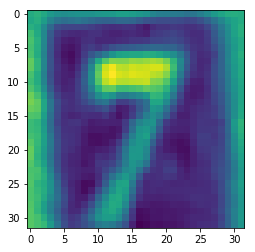

In [0]:
plt.imshow(X_train[2])

In [0]:
Y_train[2]

7

**Numeric 7 is correctly predicted as 7**

In [0]:
testY.shape


(18000, 10)

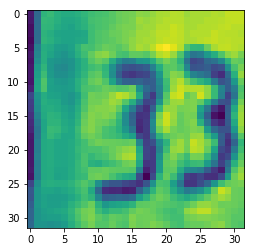

In [0]:
plt.imshow(X_test[24])